# Homework 2 STA365

## Question 1

1. **Binomial Likelihood**:
   $$
   P(x \mid \theta, n) = \binom{n}{x} \theta^x (1 - \theta)^{n - x}
   $$

2. **Discrete Uniform Prior**:
   $$
   P(\theta) = \frac{1}{101}, \quad \text{for } \theta = \frac{i}{100}, \; i = 0, 1, \dots, 100
   $$

3. **Bayes' Theorem**:
   $$
   P(\theta \mid x, n) = \frac{P(x \mid \theta, n) P(\theta)}{P(x)}
   $$

   Substitute the likelihood and prior:
   $$
   P\left(\theta = \frac{i}{100} \mid x, n\right) \propto \left(\frac{i}{100}\right)^x \left(1 - \frac{i}{100}\right)^{n - x}
   $$

4. **Posterior Distribution**:
   
   The posterior distribution of $\theta$, given a Binomial likelihood and a Discrete prior, is another Dirscrete distribution 
   $$
   P(\theta \mid x, n) = \text{Discrete}\left(P\left(\theta = \frac{0}{100} \mid x, n\right), P\left(\theta = \frac{1}{100} \mid x, n\right), \dots, P\left(\theta = \frac{100}{100} \mid x, n\right)\right)
   $$
   with updated parameters: 
   $$
   \theta = \frac{i}{100}, \; i = 0, 1, \dots, 100
   $$


## Question 2

1. **Posterior Distribution**:
The posterior distribution for each arm \( j \) is:
$$
P(\theta_j \mid x_j^{(t)}, n_j^{(t)}) \propto \theta_j^{x_j^{(t)} + \alpha_j - 1} (1 - \theta_j)^{n_j^{(t)} - x_j^{(t)} + \beta_j - 1}.
$$

This follows the **Beta Distribution**:
$$
P(\theta_j \mid x_j^{(t)}, n_j^{(t)}) = \text{Beta}(\alpha_j^{(t)}, \beta_j^{(t)}),
$$
where the parameters are updated as:
- $ \alpha_j^{(t+1)} = x_j^{(t)} + \alpha_j $
- $ \beta_j^{(t+1)} = n_j^{(t)} - x_j^{(t)} + \beta_j $.

---

2. **Iterative Learning Process**:

The algorithm proceeds as follows:

1. Initialize $ n_j^{(0)} = 0 $, $ x_j^{(0)} = 0 $, and priors $ \alpha_j, \beta_j $.
2. At each step $ t $:
   - Sample $ \theta_1 $ and $ \theta_2 $ from their respective posteriors.
   - Flip the coin for the arm with the higher sampled value:
     - $ \theta_1^{true} $ or $ \theta_2^{true} $.
   - Update the counts $ x_j^{(t+1)} $ (successes) and $ n_j^{(t+1)} $ (total flips).
3. Repeat for $ t = 1, 2, \dots, m $.

---

3. **Graph**:

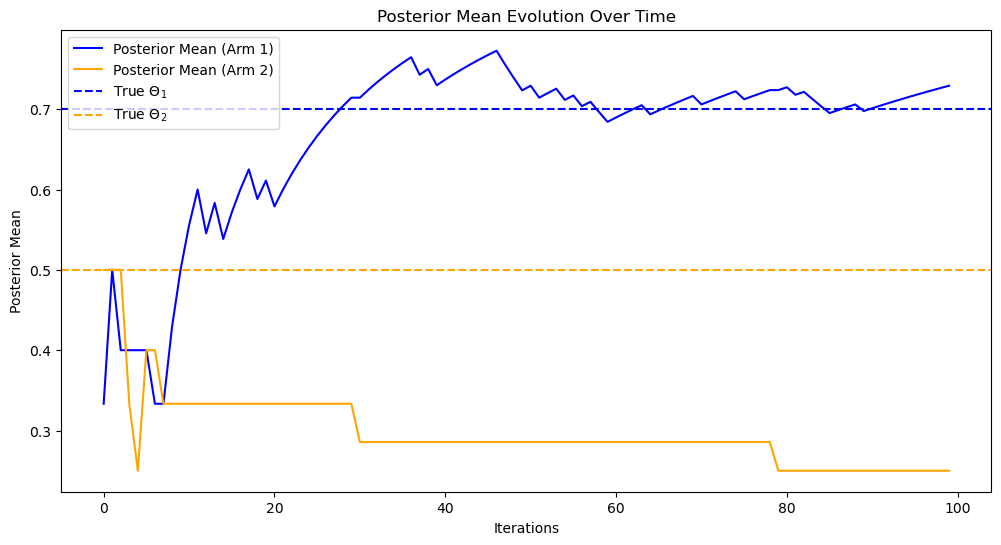

Final estimate for theta1: 0.667
Final estimate for theta2: 0.600


In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the true success probabilities for both arms
theta1_true = 0.7  # True probability for arm 1
theta2_true = 0.5  # True probability for arm 2

# Initialize Beta prior parameters for both arms
alpha1, beta1 = 1, 1  # Priors for arm 1
alpha2, beta2 = 1, 1  # Priors for arm 2

# Counters for successes and total trials for both arms
successes1, trials1 = 0, 0
successes2, trials2 = 0, 0

# Number of iterations
num_iterations = 100
samples_per_iteration = 1000  # Samples for Monte Carlo simulation

# Lists to track posterior means over time
posterior_means_arm1 = []
posterior_means_arm2 = []

# Start the simulation
for iteration in range(num_iterations):
    # Monte Carlo simulation to estimate the probability that theta_1 < theta_2
    theta1_samples = beta.rvs(alpha1 + successes1, beta1 + trials1 - successes1, size=samples_per_iteration)
    theta2_samples = beta.rvs(alpha2 + successes2, beta2 + trials2 - successes2, size=samples_per_iteration)

    prob_theta1_less_than_theta2 = np.mean(theta1_samples < theta2_samples)

    # Decide which arm to pull based on the probability
    if np.random.rand() < prob_theta1_less_than_theta2:
        # Pull arm 2
        reward = np.random.rand() < theta2_true
        successes2 += reward
        trials2 += 1
    else:
        # Pull arm 1
        reward = np.random.rand() < theta1_true
        successes1 += reward
        trials1 += 1

    # Update posterior means for tracking
    posterior_means_arm1.append((alpha1 + successes1) / (alpha1 + beta1 + trials1))
    posterior_means_arm2.append((alpha2 + successes2) / (alpha2 + beta2 + trials2))

# Visualization: Posterior Means Over Time
plt.figure(figsize=(12, 6))
plt.plot(range(num_iterations), posterior_means_arm1, label="Posterior Mean (Arm 1)", color="blue")
plt.plot(range(num_iterations), posterior_means_arm2, label="Posterior Mean (Arm 2)", color="orange")
plt.axhline(y=theta1_true, color="blue", linestyle="--", label="True $\Theta_1$")
plt.axhline(y=theta2_true, color="orange", linestyle="--", label="True $\Theta_2$")
plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Posterior Mean Evolution Over Time")
plt.legend()
plt.show()

# Print final estimates
print(f"Final estimate for theta1: {(alpha1 + x1) / (alpha1 + beta1 + n1):.3f}")
print(f"Final estimate for theta2: {(alpha2 + x2) / (alpha2 + beta2 + n2):.3f}")

## Question 3

1. **Compare Approach**:

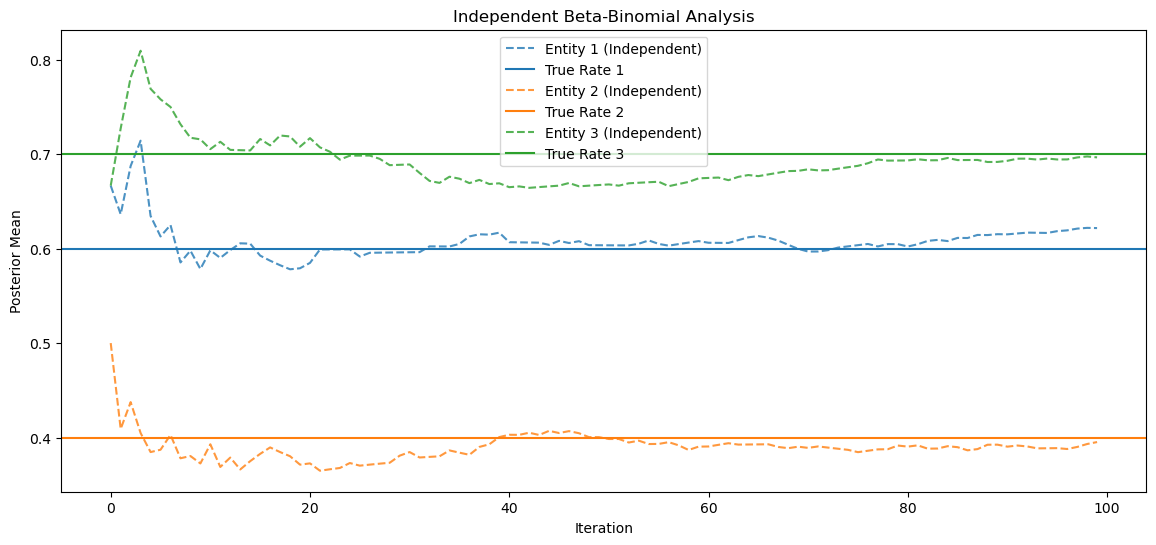

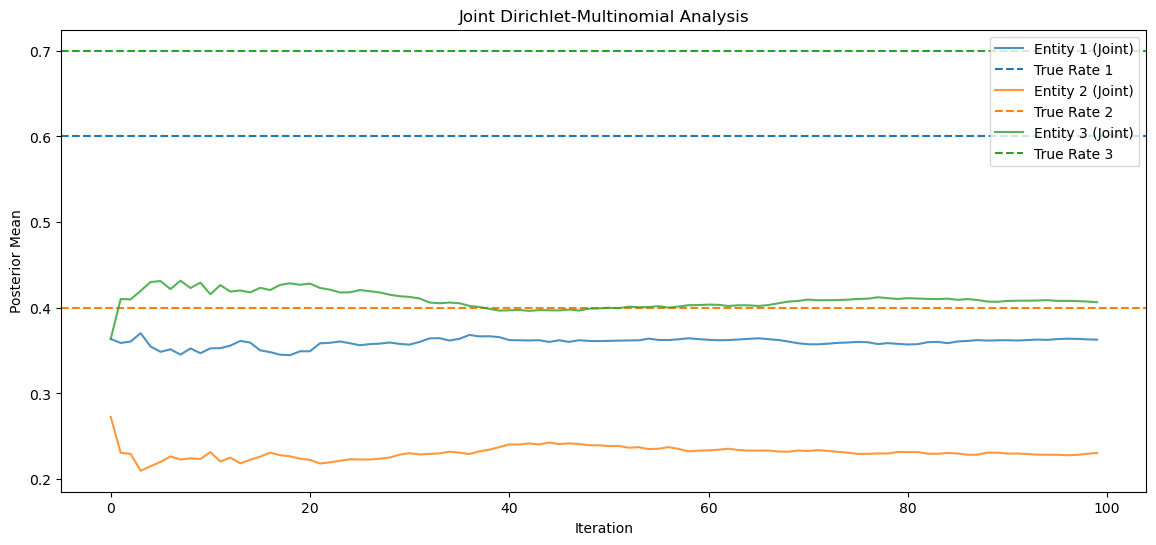

Final posterior mean estimates (Independent Beta-Binomial):
Theta 1: 0.622
Theta 2: 0.395
Theta 3: 0.697

Final posterior mean estimates (Joint Dirichlet-Multinomial):
Theta 1: 0.363
Theta 2: 0.231
Theta 3: 0.407


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# Define the true probabilities for each entity
true_success_rates = [0.6, 0.4, 0.7]  # Probabilities for entities 1, 2, 3

# Initialize Beta prior parameters for independent Beta-Binomial analysis
beta_priors = [[1, 1], [1, 1], [1, 1]]  # [alpha, beta] for each entity
independent_means = [[] for _ in range(3)]  # Stores posterior means for each entity

# Initialize Dirichlet prior parameters for joint Dirichlet-Multinomial analysis
dirichlet_params = [1, 1, 1]  # Alpha parameters for Dirichlet prior
joint_means = []  # Stores posterior means for the Dirichlet model

# Simulation settings
iterations = 100
observations_per_round = 10  # Number of trials per iteration

# Start Bayesian multi-armed bandit simulation
for round_num in range(iterations):
    # Simulate observed data (successes) for each entity
    observed_successes = [np.random.binomial(observations_per_round, prob) for prob in true_success_rates]
    
    # --------- Independent Beta-Binomial Analysis ---------
    for entity_idx in range(3):
        # Update Beta prior parameters based on observed data
        beta_priors[entity_idx][0] += observed_successes[entity_idx]  # Update alpha
        beta_priors[entity_idx][1] += observations_per_round - observed_successes[entity_idx]  # Update beta
        # Calculate posterior mean for the entity
        posterior_mean = beta_priors[entity_idx][0] / sum(beta_priors[entity_idx])
        independent_means[entity_idx].append(posterior_mean)
    
    # --------- Joint Dirichlet-Multinomial Analysis ---------
    dirichlet_params = [dirichlet_params[i] + observed_successes[i] for i in range(3)]  # Update Dirichlet parameters
    # Normalize Dirichlet parameters to compute posterior means
    normalized_means = np.array(dirichlet_params) / sum(dirichlet_params)
    joint_means.append(normalized_means)

# ---------- Visualization ----------
# Plot posterior mean evolution for independent Beta-Binomial analysis
plt.figure(figsize=(14, 6))
for entity_idx in range(3):
    plt.plot(range(iterations), independent_means[entity_idx], linestyle='--',
             label=f"Entity {entity_idx + 1} (Independent)", alpha=0.8)
    plt.axhline(true_success_rates[entity_idx], color=f"C{entity_idx}", linestyle="-", label=f"True Rate {entity_idx + 1}")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Independent Beta-Binomial Analysis")
plt.legend()
plt.show()

# Plot posterior mean evolution for joint Dirichlet-Multinomial analysis
joint_means_array = np.array(joint_means)
plt.figure(figsize=(14, 6))
for entity_idx in range(3):
    plt.plot(range(iterations), joint_means_array[:, entity_idx], linestyle='-', label=f"Entity {entity_idx + 1} (Joint)", alpha=0.8)
    plt.axhline(true_success_rates[entity_idx], color=f"C{entity_idx}", linestyle="--", label=f"True Rate {entity_idx + 1}")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Joint Dirichlet-Multinomial Analysis")
plt.legend()
plt.show()

# ---------- Final Estimates Printing ----------

# Print final posterior mean estimates for Independent Beta-Binomial Analysis
print("Final posterior mean estimates (Independent Beta-Binomial):")
for entity_idx in range(3):
    final_mean = independent_means[entity_idx][-1]  # The last mean from the list for each entity
    print(f"Theta {entity_idx + 1}: {final_mean:.3f}")

# Print final posterior mean estimates for Joint Dirichlet-Multinomial Analysis
print("\nFinal posterior mean estimates (Joint Dirichlet-Multinomial):")
for entity_idx, mean in enumerate(joint_means[-1]):  # Use the last set of means for each entity
    print(f"Theta {entity_idx + 1}: {mean:.3f}")


From the result, we can conclude that Beta-Binomial Approach is the most appropriate here.

2. **Real World AB Testing**:
A company runs **three ad campaigns (Ad A, Ad B, Ad C)** and aims to maximize click-through rates (CTR). Using a Bayesian multi-armed bandit:

- **Exploration**: Tests all ads to estimate CTRs.
- **Exploitation**: Prioritizes ads with higher CTRs to maximize engagement.
- **Thompson Sampling**: Selects ads based on posterior samples of their CTRs.

This approach dynamically balances exploration and exploitation, ensuring cost-effective real-time ad optimization.

